In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df_avec_details_financiers=pd.read_parquet("datasets_finaux/dataset_avec_details_financiers.parquet", engine="fastparquet")
df_avec_details_financiers=df_avec_details_financiers.drop(["siren"],axis=1) 


In [8]:
proportion_survie_avec_details = (df_avec_details_financiers['etatAdministratifUniteLegale'] == 1).mean() 

In [9]:
def split(dataset,seed=42,yes_validation=True):
    x=dataset.drop(["etatAdministratifUniteLegale"],axis=1)
    y=dataset["etatAdministratifUniteLegale"]
    if(yes_validation==True): #crée un validation set
        x_train, x_temp, y_train, y_temp = train_test_split( x, y, test_size=0.3, random_state=seed,stratify=y ) 
        x_validation, x_test, y_validation, y_test = train_test_split( x_temp, y_temp, test_size=0.5, random_state=seed,stratify=y_temp )
        return x_train,x_test,y_train,y_test,x_validation, y_validation
    else:
        x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=seed,stratify=y )
        return x_train,x_test,y_train,y_test

In [10]:

df_avec_details_financiers.describe()

,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,etatAdministratifUniteLegale,activitePrincipaleUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,nbEtablissements,...,Poids_BFR_exploitation_sur_CA_jours_std,Rotation_des_stocks_jours_tcam,Rotation_des_stocks_jours_moyen,Rotation_des_stocks_jours_std,Credit_clients_Jours_tcam,Credit_clients_Jours_moyen,Credit_clients_Jours_std,Credit_fournisseurs_Jours_tcam,Credit_fournisseurs_Jours_moyen,Credit_fournisseurs_Jours_std
count,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,36388.000000,...,1.020800e+04,36388.000000,24987.000000,10208.000000,3.638800e+04,2.585800e+04,1.057500e+04,36388.000000,30949.000000,13938.000000
mean,0.624959,716.122430,1.908047,0.883148,1682.701468,0.753985,6727.183659,-0.780312,-0.016132,1.597065,...,7.480287e+03,1.086114,50.105515,29.575152,8.025136e+01,2.317237e+02,2.344777e+02,88.274032,214.452532,268.215527
std,3.908498,967.424448,1.100800,0.477692,756.727545,0.430693,472.703869,0.432862,0.126636,1.176745,...,4.205706e+05,84.146487,2625.122854,1495.061791,7.554200e+03,1.048151e+04,1.466719e+04,1681.567562,5650.914279,8450.623203
min,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2611.000000,-1.000000,-1.000000,1.000000,...,0.000000e+00,-100.000000,-7908.827000,0.000000,-1.000000e+02,-6.303175e+03,0.000000e+00,-100.000000,-248329.335000,0.000000
25%,-1.000000,0.000000,1.000000,1.000000,2023.000000,1.000000,6202.000000,-1.000000,0.000000,1.000000,...,1.701162e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.285750e+00,0.000000,5.921000,3.389625
50%,-1.000000,0.000000,2.000000,1.000000,2023.000000,1.000000,7022.000000,-1.000000,0.000000,1.000000,...,4.112625e+01,0.000000,0.000000,0.000000,0.000000e+00,4.413933e+01,1.826750e+01,0.000000,36.996000,16.578250
75%,1.000000,2023.000000,2.000000,1.000000,2023.000000,1.000000,7022.000000,-1.000000,0.000000,2.000000,...,1.052288e+02,0.000000,0.000000,0.000000,0.000000e+00,1.053450e+02,4.911150e+01,0.000000,109.442000,54.519575
max,51.000000,2023.000000,12.000000,3.000000,2023.000000,1.000000,7219.000000,1.000000,1.000000,47.000000,...,3.982060e+07,12180.645161,288555.607000,138140.380773,1.421818e+06,1.255464e+06,1.479579e+06,125602.515723,599914.651667,847892.913646


In [11]:
df_avec_details_financiers.head()

,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,etatAdministratifUniteLegale,activitePrincipaleUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,nbEtablissements,...,Poids_BFR_exploitation_sur_CA_jours_std,Rotation_des_stocks_jours_tcam,Rotation_des_stocks_jours_moyen,Rotation_des_stocks_jours_std,Credit_clients_Jours_tcam,Credit_clients_Jours_moyen,Credit_clients_Jours_std,Credit_fournisseurs_Jours_tcam,Credit_fournisseurs_Jours_moyen,Credit_fournisseurs_Jours_std
0,-1,0,3,1,2023,1,7022,0,0,1,...,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.0,43.591,NaN
1,-1,0,3,1,2023,1,7022,-1,0,3,...,NaN,0.0,22.369,NaN,0.0,0.000,NaN,0.0,33.286,NaN
2,2,2023,2,1,2023,1,6209,-1,0,2,...,NaN,0.0,5.602,NaN,0.0,39.735,NaN,0.0,42.464,NaN
3,-1,0,2,1,2023,0,7022,0,0,1,...,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.0,52.993,NaN
4,21,2023,5,1,2023,1,7022,-1,0,8,...,NaN,0.0,0.000,NaN,0.0,78.778,NaN,0.0,21.579,NaN


In [12]:
df_avec_details_financiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36388 entries, 0 to 36387
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   trancheEffectifsUniteLegale                 36388 non-null  int64  
 1   anneeEffectifsUniteLegale                   36388 non-null  int64  
 2   nombrePeriodesUniteLegale                   36388 non-null  int64  
 3   categorieEntreprise                         36388 non-null  int64  
 4   anneeCategorieEntreprise                    36388 non-null  int64  
 5   etatAdministratifUniteLegale                36388 non-null  int64  
 6   activitePrincipaleUniteLegale               36388 non-null  int64  
 7   economieSocialeSolidaireUniteLegale         36388 non-null  int64  
 8   societeMissionUniteLegale                   36388 non-null  int64  
 9   nbEtablissements                            36388 non-null  int32  
 10  Chiffre_d_

In [ ]:
# Nombre de lignes non nulles par colonne
for col in df_avec_details_financiers.columns:
    non_null_count = df_avec_details_financiers[col].notnull().sum()
    print(f"Colonne '{col}': {non_null_count} valeurs non nulles")

trancheEffectifsUniteLegale        36388
anneeEffectifsUniteLegale          36388
nombrePeriodesUniteLegale          36388
categorieEntreprise                36388
anneeCategorieEntreprise           36388
                                   ...  
Credit_clients_Jours_moyen         25858
Credit_clients_Jours_std           10575
Credit_fournisseurs_Jours_tcam     36388
Credit_fournisseurs_Jours_moyen    30949
Credit_fournisseurs_Jours_std      13938
Length: 67, dtype: int64

/tmp/ipykernel_56665/2388605982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='etatAdministratifUniteLegale', data=df_avec_details_financiers, palette='viridis')


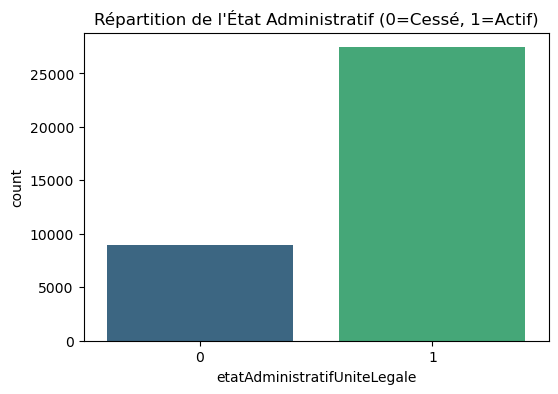

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='etatAdministratifUniteLegale', data=df_avec_details_financiers, palette='viridis')
plt.title('Répartition de l\'État Administratif (0=Cessé, 1=Actif)')
plt.show()

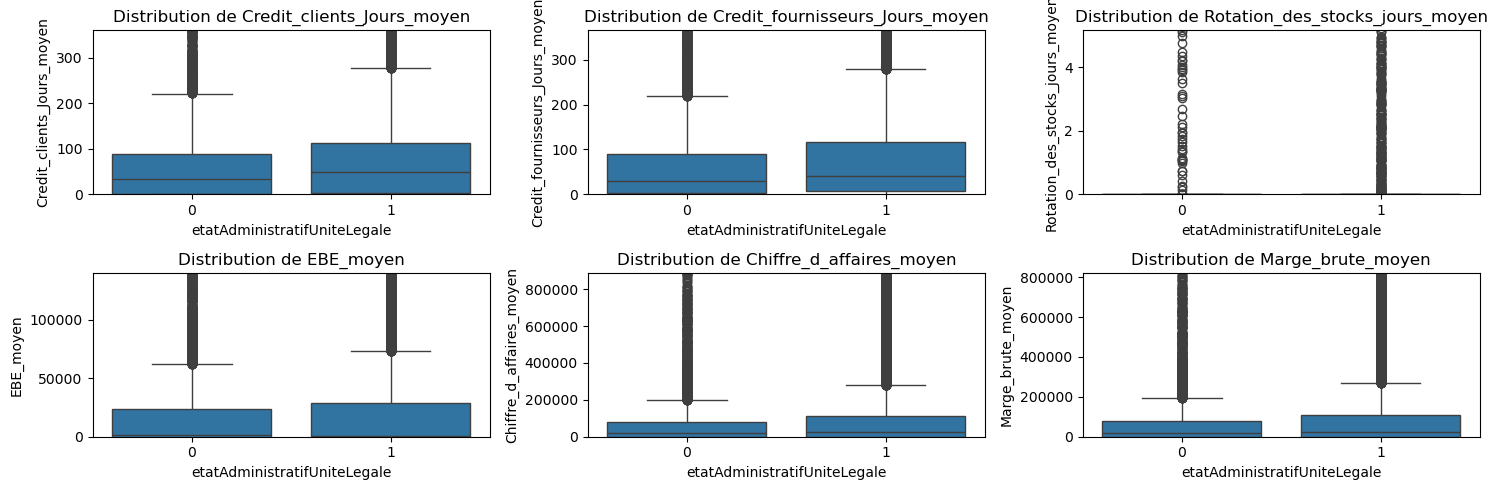

In [14]:
cols_finance = [
    'Credit_clients_Jours_moyen', 
    'Credit_fournisseurs_Jours_moyen', 
    'Rotation_des_stocks_jours_moyen',
    'EBE_moyen',
    'Chiffre_d_affaires_moyen',
    'Marge_brute_moyen',
]

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_finance, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='etatAdministratifUniteLegale', y=col, data=df_avec_details_financiers)
    plt.title(f'Distribution de {col}')
    # On limite parfois les axes si présence d'outliers extrêmes
    plt.ylim(0, df_avec_details_financiers[col].quantile(0.95)) 

plt.tight_layout()
plt.show()

Top 10 des variables corrélées positivement avec l'activité :
etatAdministratifUniteLegale     1.000000
anneeCategorieEntreprise         0.606796
categorieEntreprise              0.509462
anneeEffectifsUniteLegale        0.291675
trancheEffectifsUniteLegale      0.193635
nbEtablissements                 0.101560
activitePrincipaleUniteLegale    0.044383
Ratio_de_vetuste_moyen           0.034060
EBIT_std                         0.026575
Chiffre_d_affaires_std           0.019768
Name: etatAdministratifUniteLegale, dtype: float64


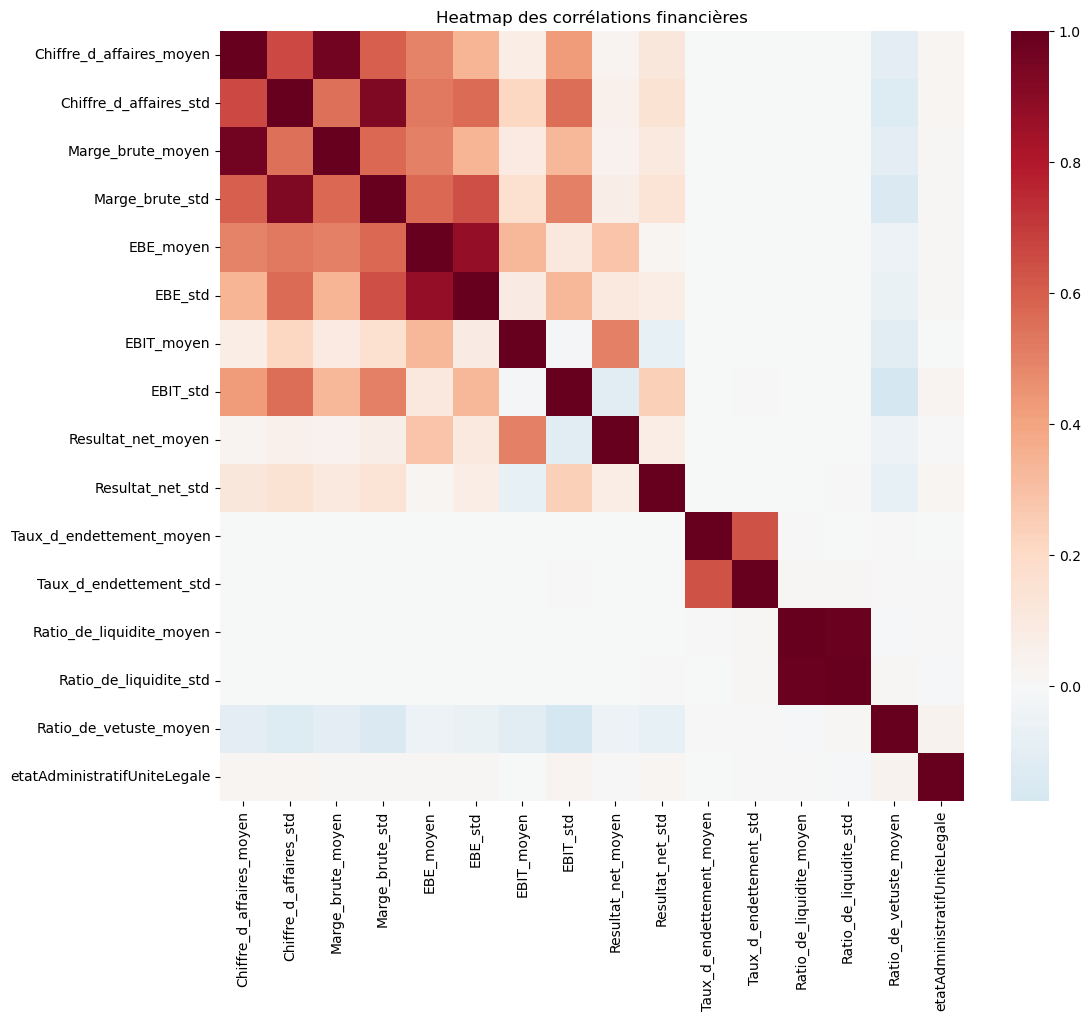

In [15]:
# Calcul de la matrice de corrélation
# On sélectionne les colonnes numériques pour éviter les erreurs
corr_matrix = df_avec_details_financiers.select_dtypes(include=[np.number]).corr()

# Focus sur la corrélation avec la cible
target_corr = corr_matrix['etatAdministratifUniteLegale'].sort_values(ascending=False)

print("Top 10 des variables corrélées positivement avec l'activité :")
print(target_corr.head(10))

# Affichage d'une Heatmap pour les variables financières
plt.figure(figsize=(12, 10))
cols_interet = [c for c in df_avec_details_financiers.columns if 'Jours' in c or 'std' in c or 'moyen' in c][:15]
cols_interet.append('etatAdministratifUniteLegale')

sns.heatmap(df_avec_details_financiers[cols_interet].corr(), annot=False, cmap='RdBu_r', center=0)
plt.title('Heatmap des corrélations financières')
plt.show()

Réalisation d'une PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
df_pca = df_avec_details_financiers.copy()

cols_a_exclure = ['siren', 'siret', 'etatAdministratifUniteLegale', 'dateCreationUniteLegale']
X = df_pca.select_dtypes(include=[np.number]).drop(columns=cols_a_exclure, errors='ignore')


X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dimensions des données pour la PCA : {X_scaled.shape}")

Dimensions des données pour la PCA : (36388, 66)


Méthode ELBOW - Visualisation des composantes principales de la PCA

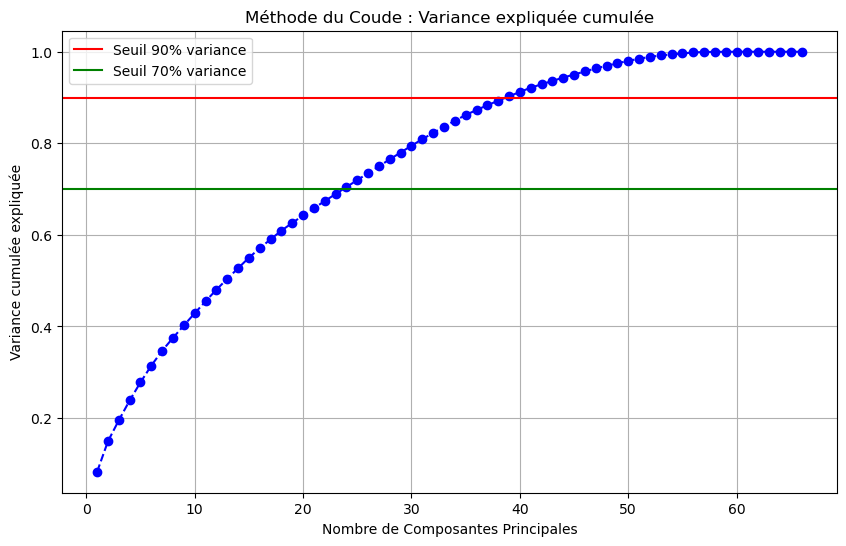

Il faut 39 composantes pour garder 90% de l'information.
Il faut 24 composantes pour garder 70% de l'information.


In [18]:


# Calcul de la PCA sur toutes les composantes possibles
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée cumulée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-', label='Seuil 90% variance')
plt.axhline(y=0.70, color='g', linestyle='-', label='Seuil 70% variance')

plt.title('Méthode du Coude : Variance expliquée cumulée')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance cumulée expliquée')
plt.grid(True)
plt.legend()
plt.show()

# Combien de composantes pour garder 90% de l'info ?
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Il faut {n_components_90} composantes pour garder 90% de l'information.")
n_components_70 = np.argmax(cumulative_variance >= 0.70) + 1
print(f"Il faut {n_components_70} composantes pour garder 70% de l'information.")

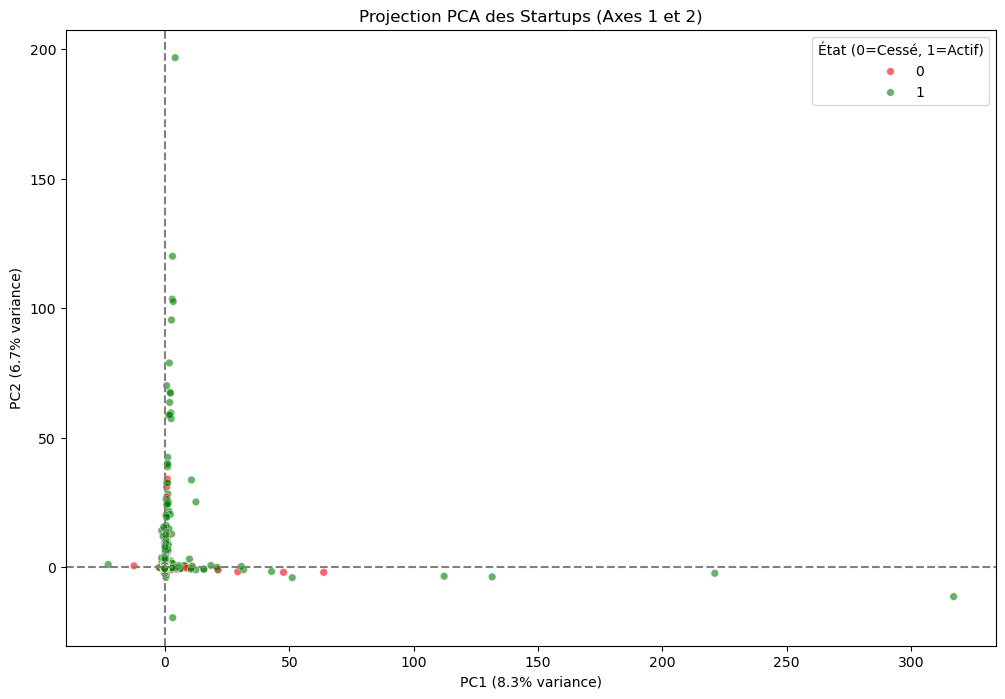

In [19]:
# --- CELLULE 3 : PROJECTION DES INDIVIDUS (SCATTER PLOT) ---

# On relance la PCA sur les 2 premiers axes pour la visualisation
pca_2d = PCA(n_components=2)
X_projected = pca_2d.fit_transform(X_scaled)

# Création d'un DataFrame temporaire pour le plot
df_visu = pd.DataFrame(X_projected, columns=['PC1', 'PC2'])
df_visu['Etat'] = df_pca['etatAdministratifUniteLegale'].values # On récupère les étiquettes

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Etat', 
    data=df_visu, 
    palette={0: 'red', 1: 'green'}, 
    alpha=0.6,
    s=30
)

plt.title('Projection PCA des Startups (Axes 1 et 2)')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.legend(title='État (0=Cessé, 1=Actif)')
plt.show()

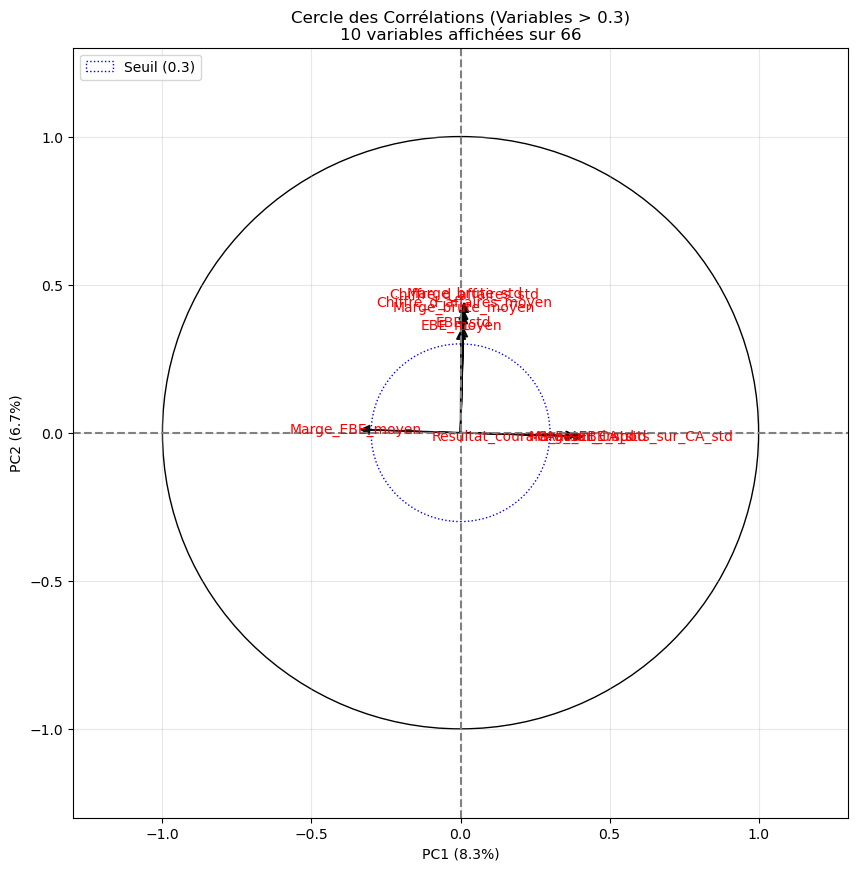

In [20]:
def plot_correlation_circle(pca, feature_names, n_components=(0, 1), min_dist=0.5):
    """
    Affiche le cercle des corrélations en ne gardant que les variables
    dont la longueur du vecteur est supérieure à min_dist.
    """
    comps = pca.components_
    x_comp = n_components[0]
    y_comp = n_components[1]
    
    plt.figure(figsize=(10, 10))
    
    # Cercle unité (max théorique)
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='-', linewidth=1)
    plt.gca().add_artist(circle)
    
    # Cercle de seuil (visuel)
    threshold_circle = plt.Circle((0, 0), min_dist, color='blue', fill=False, linestyle=':', label=f'Seuil ({min_dist})')
    plt.gca().add_artist(threshold_circle)
    
    # Calcul de la longueur de chaque vecteur
    feature_length = np.sqrt(comps[x_comp]**2 + comps[y_comp]**2)
    
    # Compteur pour savoir combien de variables sont affichées
    count = 0
    
    for i in range(len(feature_names)):
        # On ne trace que si la longueur dépasse le seuil
        if feature_length[i] >= min_dist:
            count += 1
            # Tracé de la flèche
            plt.arrow(0, 0, comps[x_comp, i], comps[y_comp, i], 
                      head_width=0.03, head_length=0.03, color='k', alpha=0.9)
            
            # Position du texte (un peu au-delà de la flèche pour lisibilité)
            txt_x = comps[x_comp, i] * 1.15
            txt_y = comps[y_comp, i] * 1.15
            
            plt.text(txt_x, txt_y, feature_names[i], 
                     color='red', ha='center', va='center', fontsize=10)

    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.xlabel(f'PC{x_comp+1} ({pca.explained_variance_ratio_[x_comp]:.1%})')
    plt.ylabel(f'PC{y_comp+1} ({pca.explained_variance_ratio_[y_comp]:.1%})')
    plt.title(f'Cercle des Corrélations (Variables > {min_dist})\n{count} variables affichées sur {len(feature_names)}')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.show()


plot_correlation_circle(pca_2d, X.columns, min_dist=0.3)

['trancheEffectifsUniteLegale', 'anneeEffectifsUniteLegale', 'nombrePeriodesUniteLegale', 'categorieEntreprise', 'anneeCategorieEntreprise', 'etatAdministratifUniteLegale', 'activitePrincipaleUniteLegale', 'economieSocialeSolidaireUniteLegale', 'societeMissionUniteLegale', 'nbEtablissements', 'Chiffre_d_affaires_tcam', 'Chiffre_d_affaires_moyen', 'Chiffre_d_affaires_std', 'Marge_brute_tcam', 'Marge_brute_moyen', 'Marge_brute_std', 'EBE_tcam', 'EBE_moyen', 'EBE_std', 'EBIT_tcam', 'EBIT_moyen', 'EBIT_std', 'Resultat_net_tcam', 'Resultat_net_moyen', 'Resultat_net_std', 'Taux_d_endettement_tcam', 'Taux_d_endettement_moyen', 'Taux_d_endettement_std', 'Ratio_de_liquidite_tcam', 'Ratio_de_liquidite_moyen', 'Ratio_de_liquidite_std', 'Ratio_de_vetuste_tcam', 'Ratio_de_vetuste_moyen', 'Ratio_de_vetuste_std', 'Autonomie_financiere_tcam', 'Autonomie_financiere_moyen', 'Autonomie_financiere_std', 'Poids_BFR_exploitation_sur_CA_tcam', 'Poids_BFR_exploitation_sur_CA_moyen', 'Poids_BFR_exploitation_su

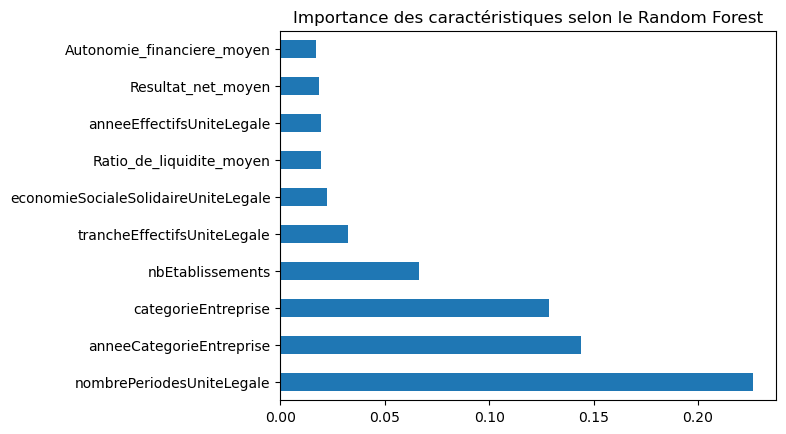

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Vérification : quelles colonnes reste-t-il ?
print(df_avec_details_financiers.columns.tolist())
X_train, X_test, y_train, y_test = split(df_avec_details_financiers, yes_validation=False)

# 1. Test rapide avec Random Forest pour voir les variables dominantes
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print(f"Score Random Forest: {rf.score(X_test, y_test):.4f}")

# 2. Afficher ce qui pèse le plus lourd
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=pd.DataFrame(X_train).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des caractéristiques selon le Random Forest")
plt.show()

['etatAdministratifUniteLegale', 'activitePrincipaleUniteLegale', 'economieSocialeSolidaireUniteLegale', 'societeMissionUniteLegale', 'Chiffre_d_affaires_tcam', 'Chiffre_d_affaires_moyen', 'Chiffre_d_affaires_std', 'Marge_brute_tcam', 'Marge_brute_moyen', 'Marge_brute_std', 'EBE_tcam', 'EBE_moyen', 'EBE_std', 'EBIT_tcam', 'EBIT_moyen', 'EBIT_std', 'Resultat_net_tcam', 'Resultat_net_moyen', 'Resultat_net_std', 'Taux_d_endettement_tcam', 'Taux_d_endettement_moyen', 'Taux_d_endettement_std', 'Ratio_de_liquidite_tcam', 'Ratio_de_liquidite_moyen', 'Ratio_de_liquidite_std', 'Ratio_de_vetuste_tcam', 'Ratio_de_vetuste_moyen', 'Ratio_de_vetuste_std', 'Autonomie_financiere_tcam', 'Autonomie_financiere_moyen', 'Autonomie_financiere_std', 'Poids_BFR_exploitation_sur_CA_tcam', 'Poids_BFR_exploitation_sur_CA_moyen', 'Poids_BFR_exploitation_sur_CA_std', 'Couverture_des_interets_tcam', 'Couverture_des_interets_moyen', 'Couverture_des_interets_std', 'CAF_sur_CA_tcam', 'CAF_sur_CA_moyen', 'CAF_sur_CA_st

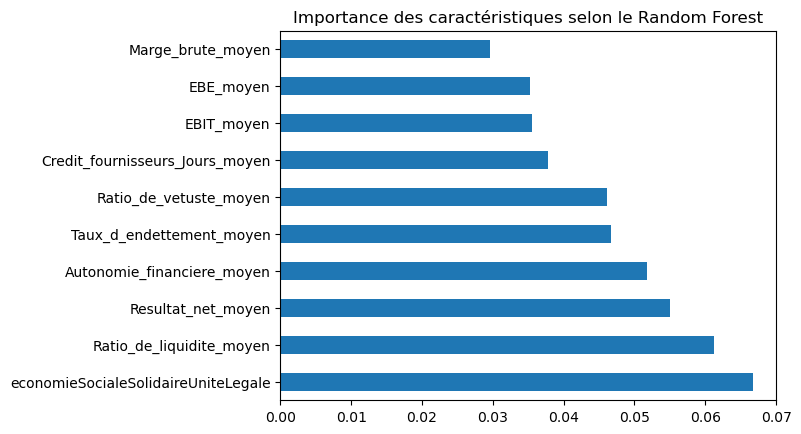

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

cols_to_drop = [
    'nombrePeriodesUniteLegale', 
    'anneeCategorieEntreprise', 
    'anneeEffectifsUniteLegale', # Même problème que anneeCategorie
    'trancheEffectifsUniteLegale', # Si c'est la donnée 2025
    'nbEtablissements',            # Si c'est la donnée 2025
    'categorieEntreprise'          # Souvent corrélé à la survie par définition
]

df_clean = df_avec_details_financiers.drop(cols_to_drop, axis=1, errors='ignore')

# Vérification : quelles colonnes reste-t-il ?
print(df_clean.columns.tolist())
X_train, X_test, y_train, y_test = split(df_clean, yes_validation=False)

# 1. Test rapide avec Random Forest pour voir les variables dominantes
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print(f"Score Random Forest: {rf.score(X_test, y_test):.4f}")

# 2. Afficher ce qui pèse le plus lourd
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=pd.DataFrame(X_train).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des caractéristiques selon le Random Forest")
plt.show()

Taux de survie par statut ESS :
economieSocialeSolidaireUniteLegale
-1    0.819167
 0    0.502023
 1    0.748276
Name: etatAdministratifUniteLegale, dtype: float64


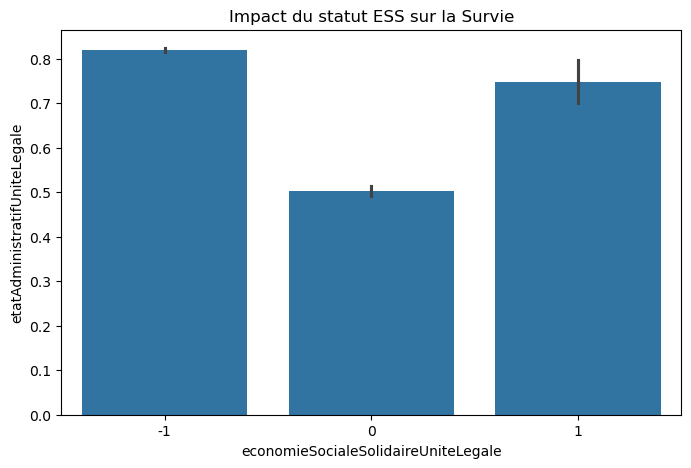

In [29]:
# Vérifiez le taux de survie selon le statut ESS
survie_ess = df_clean.groupby('economieSocialeSolidaireUniteLegale')['etatAdministratifUniteLegale'].mean()
print("Taux de survie par statut ESS :")
print(survie_ess)

# Visualisation simple
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='economieSocialeSolidaireUniteLegale', y='etatAdministratifUniteLegale', data=df_clean)
plt.title('Impact du statut ESS sur la Survie')
plt.show()